In [31]:
from MDRMF.dataset import Dataset
import glob

In [32]:
files = glob.glob('C:/Users/xsj110/OneDrive - University of Copenhagen/Master/02 AI Lab/43 article 30n/(article) 08 tanimoto tests (130k) - fixed no remove-240620-140357-c10602c4/morgan tanimoto/model_datasets_rep_1/*.pkl', recursive=True)

datasets = []
mols_acquired = []

for file in files:
    dataset = Dataset.load(file)
    datasets.append(dataset)

mols_per_iteration = []
for i, mols in enumerate(datasets):
    if i == 0:
        mols_per_iteration.append(set(mols.ids))
    else:
        set1 = set(mols.ids)
        set2 = set(datasets[i-1].ids)
        unique = set1 - set2
        mols_per_iteration.append(unique)

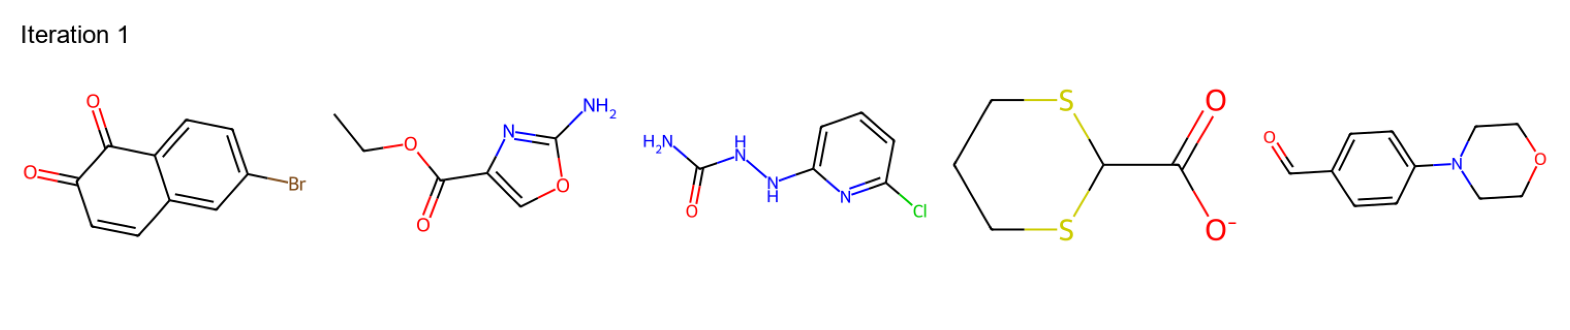

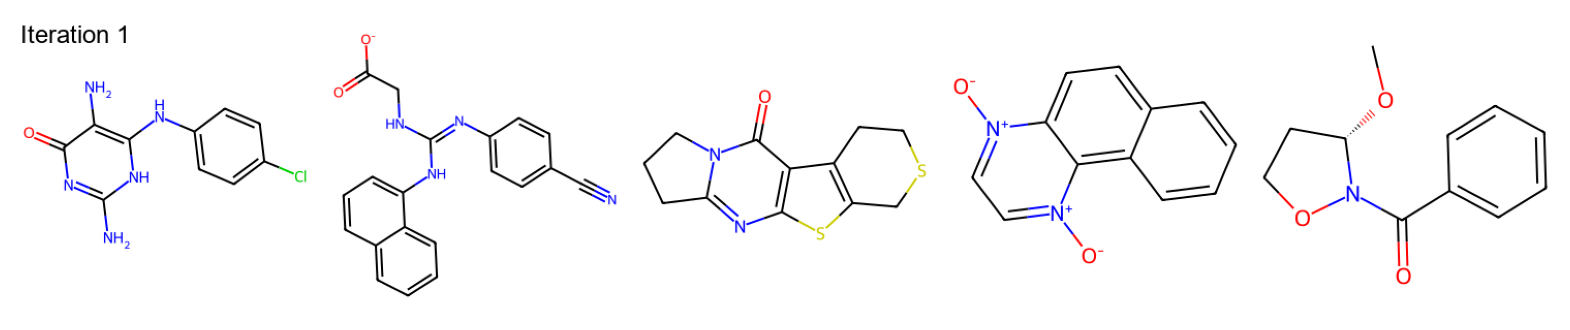

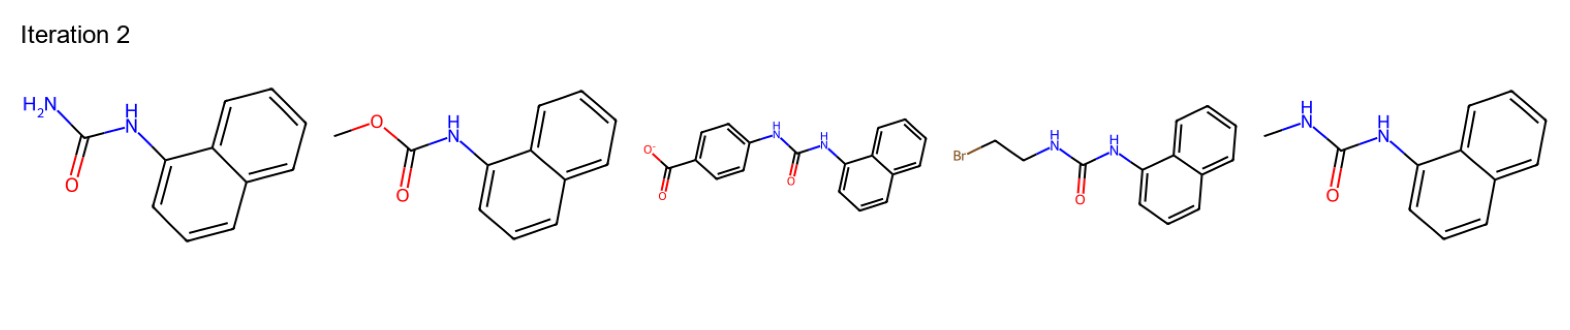

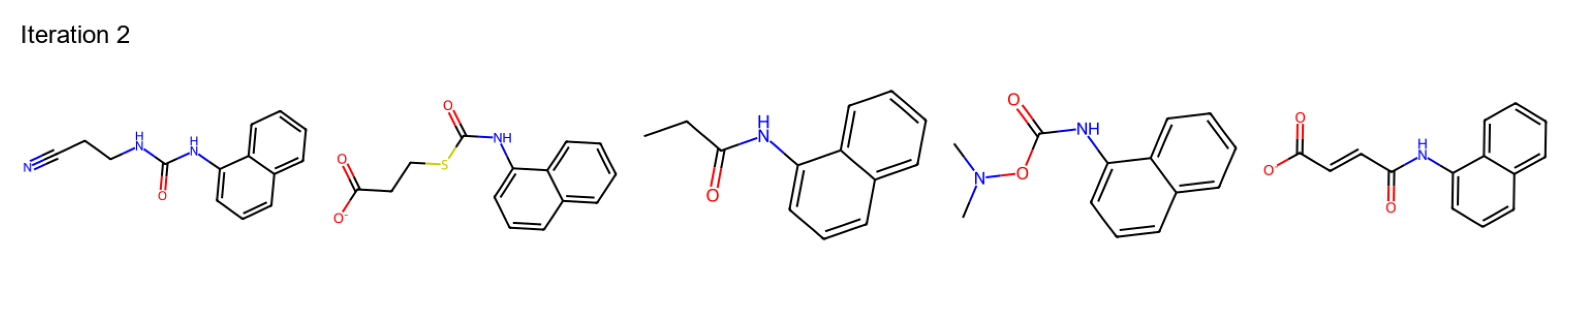

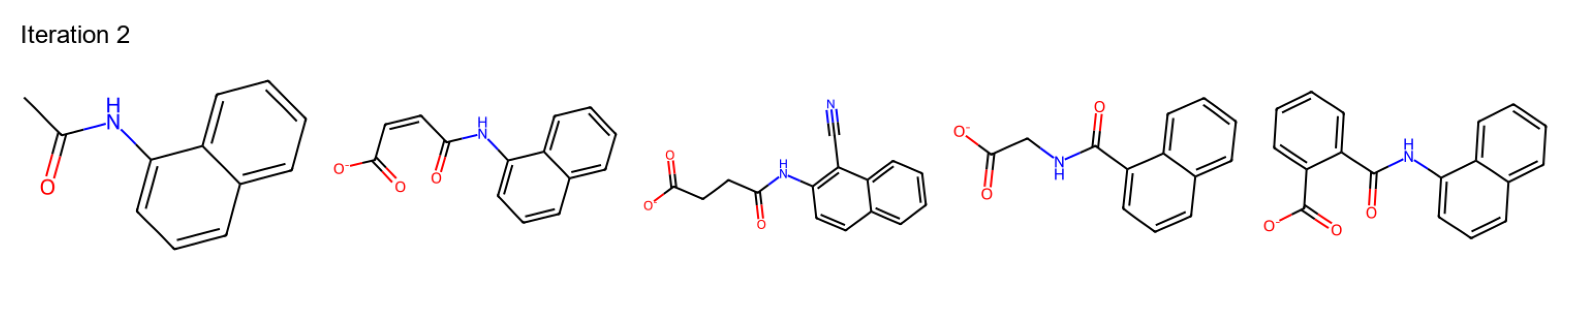

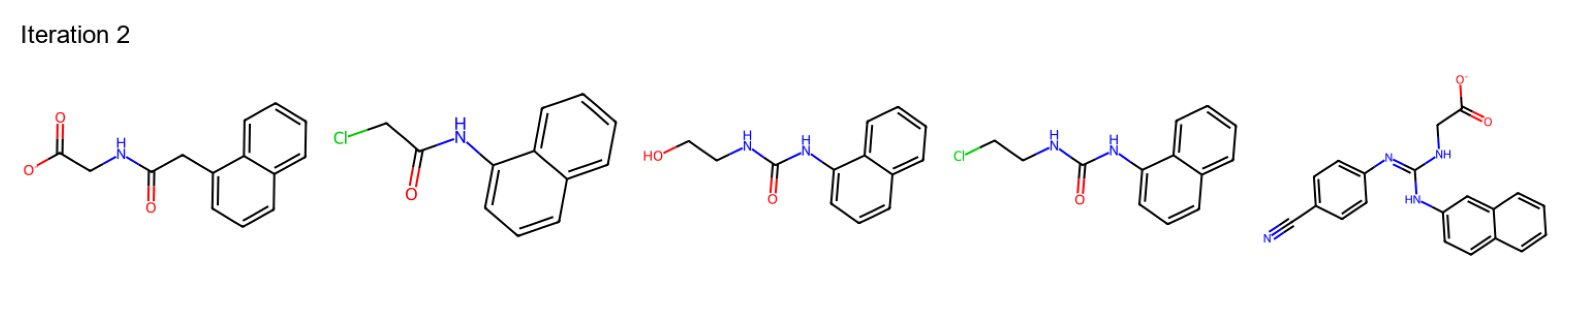

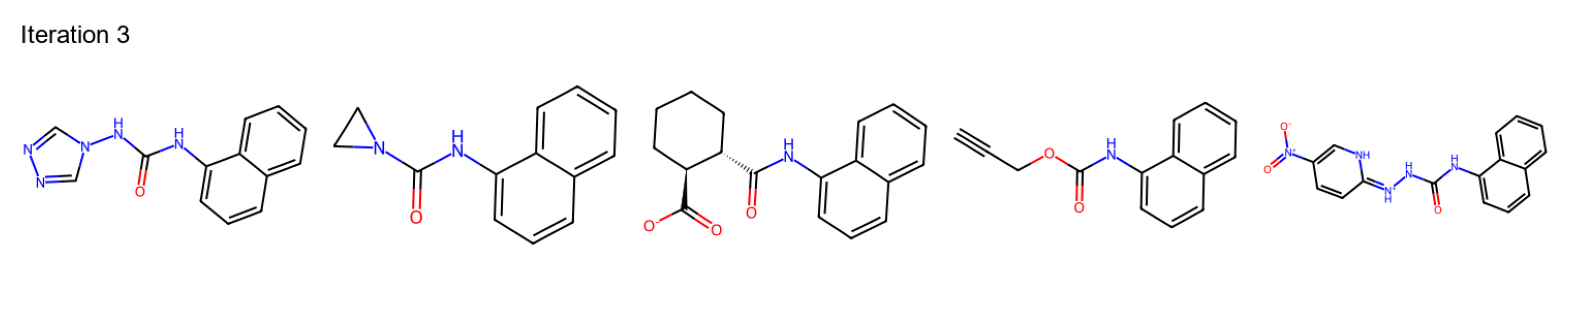

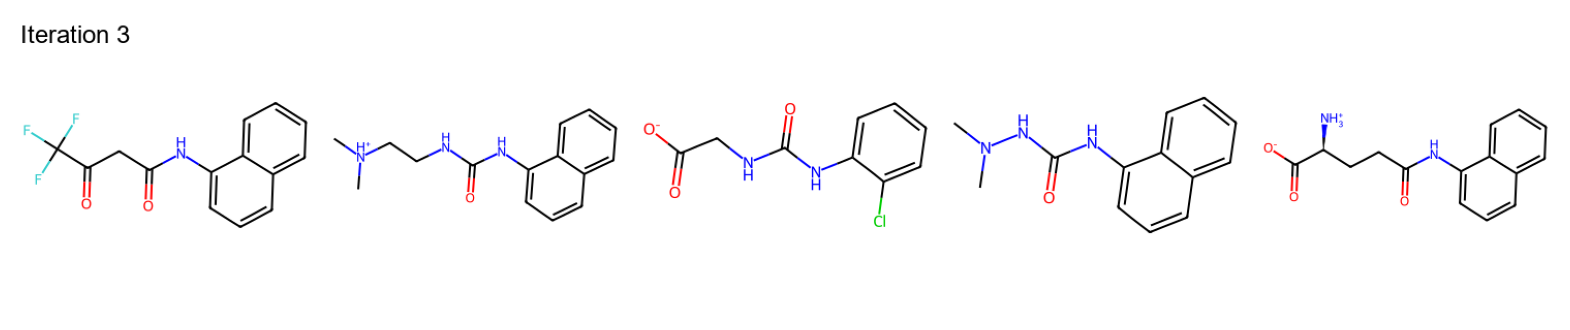

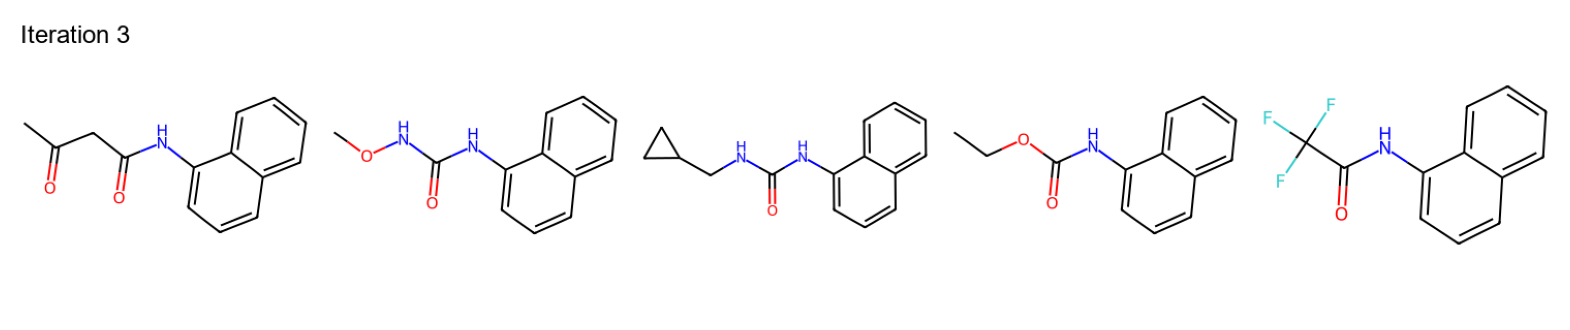

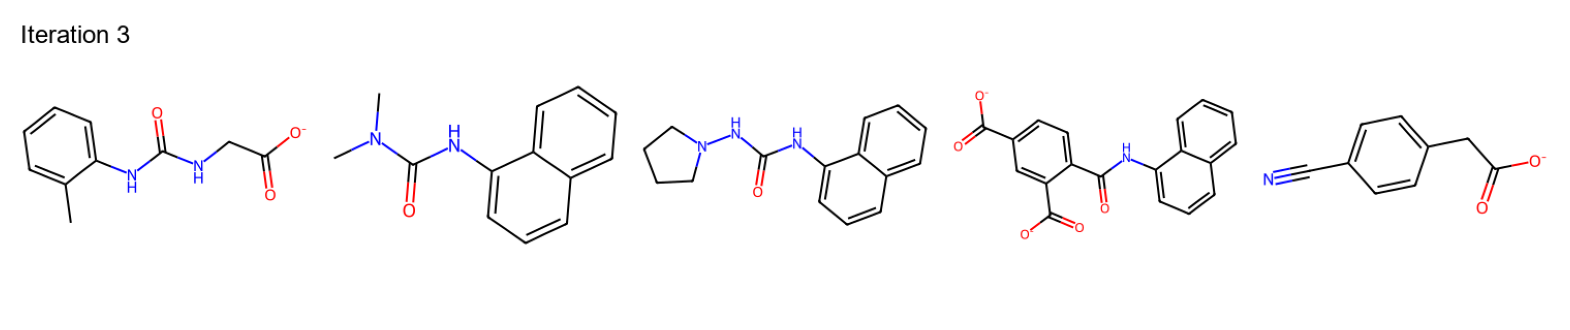

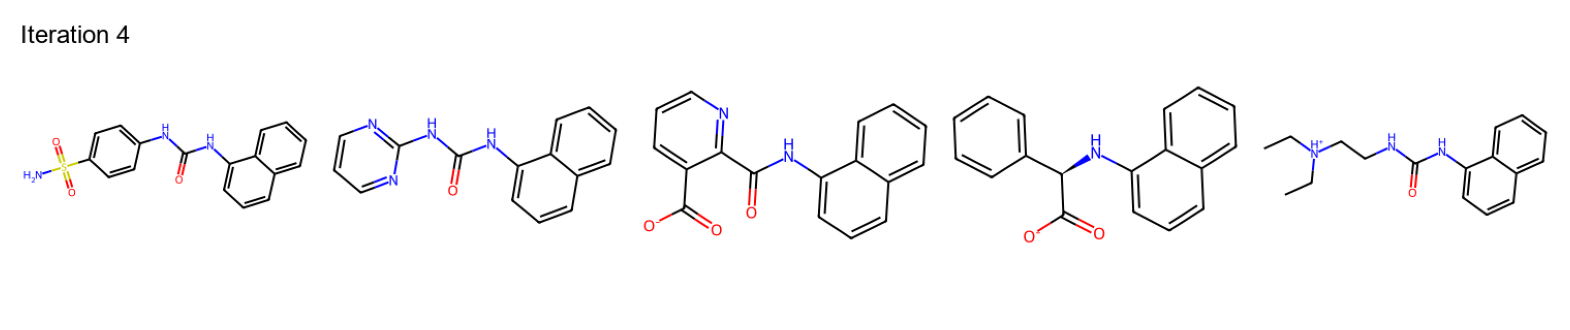

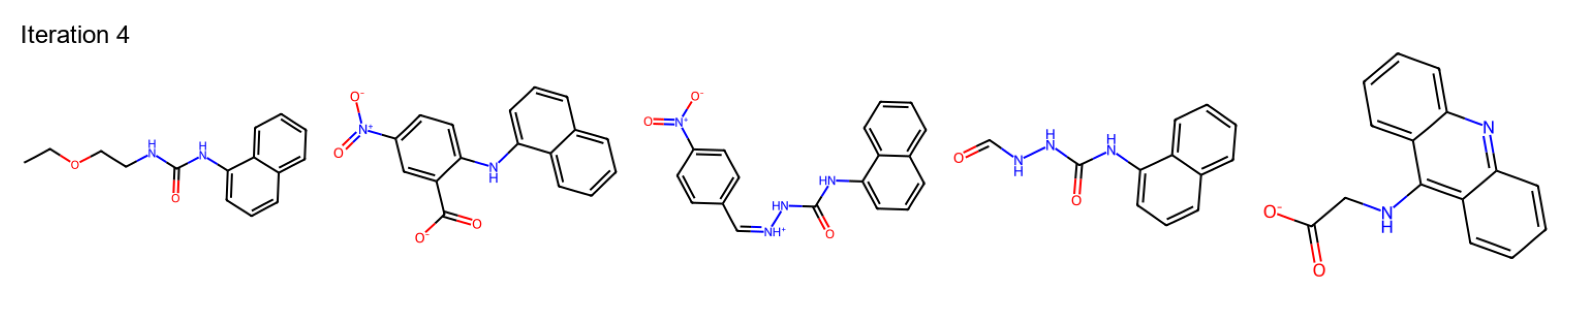

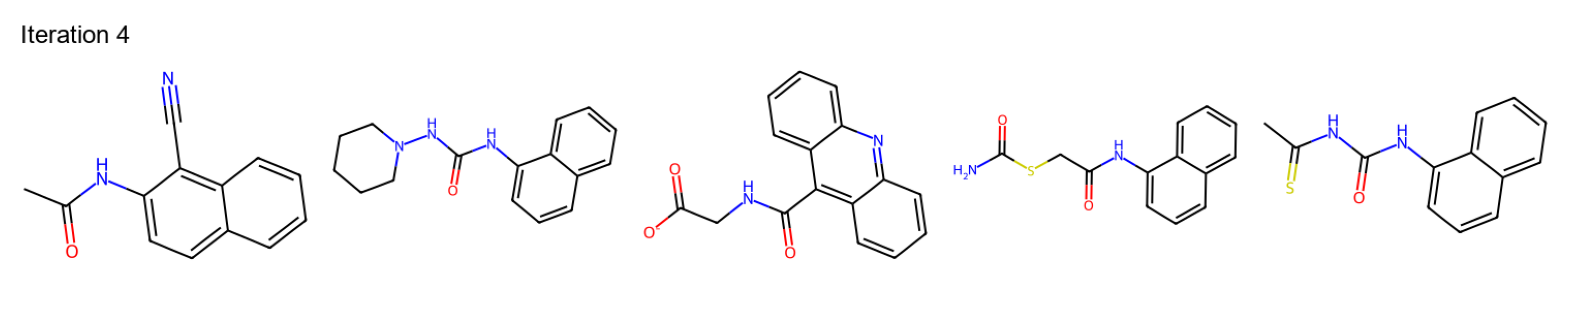

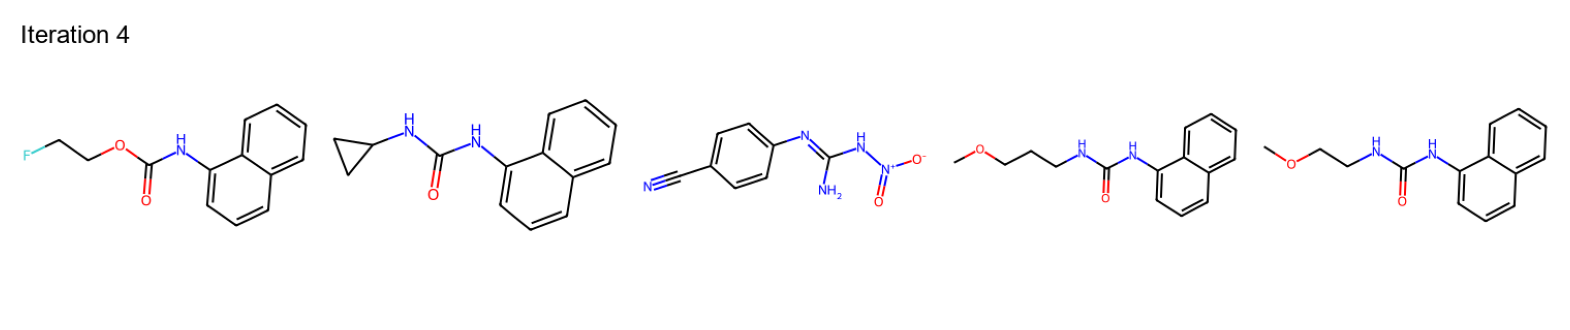

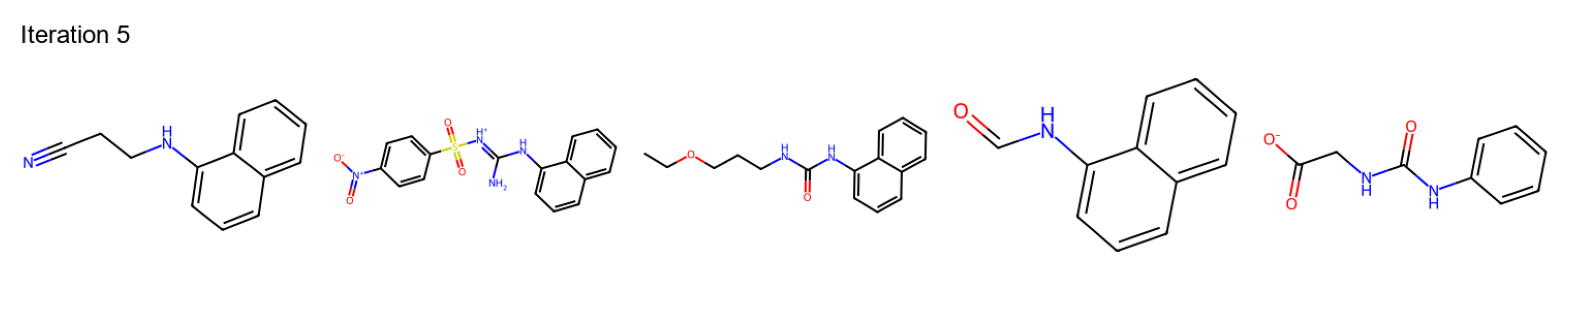

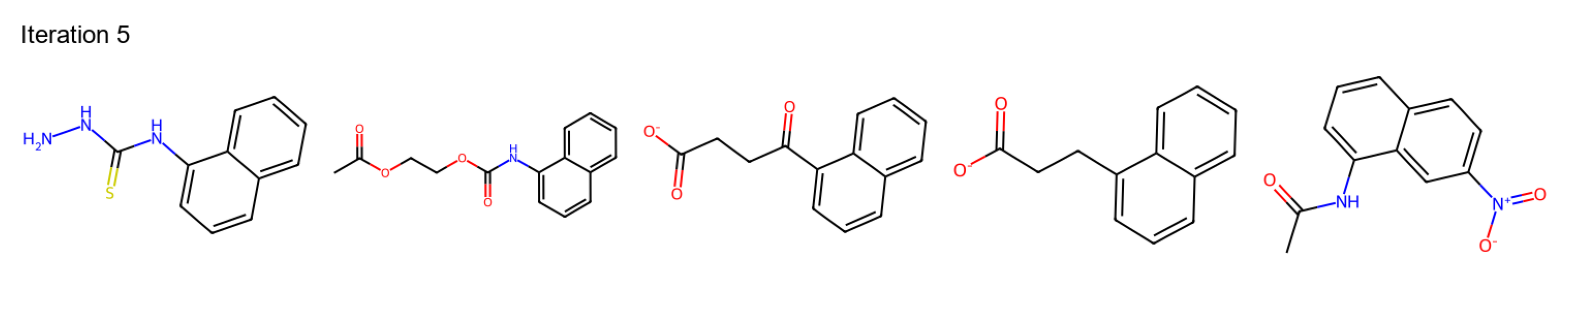

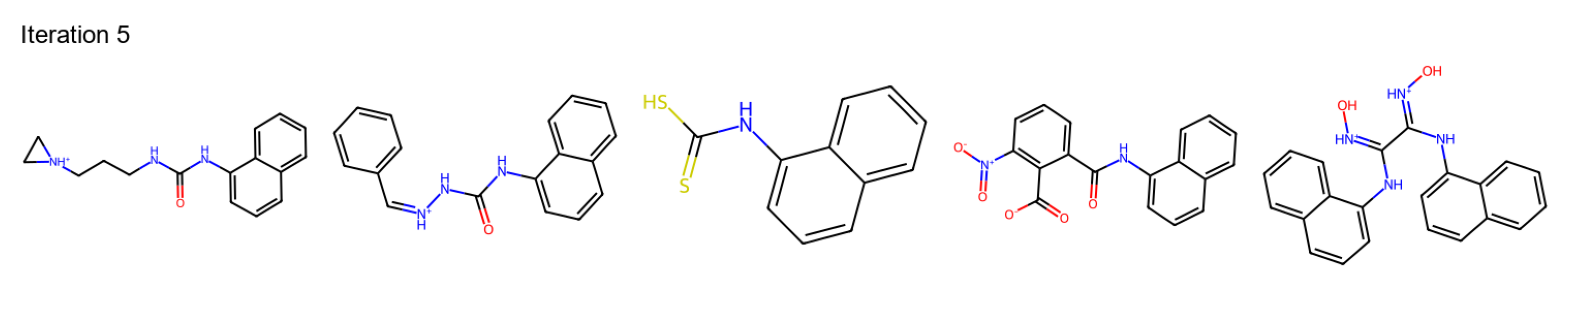

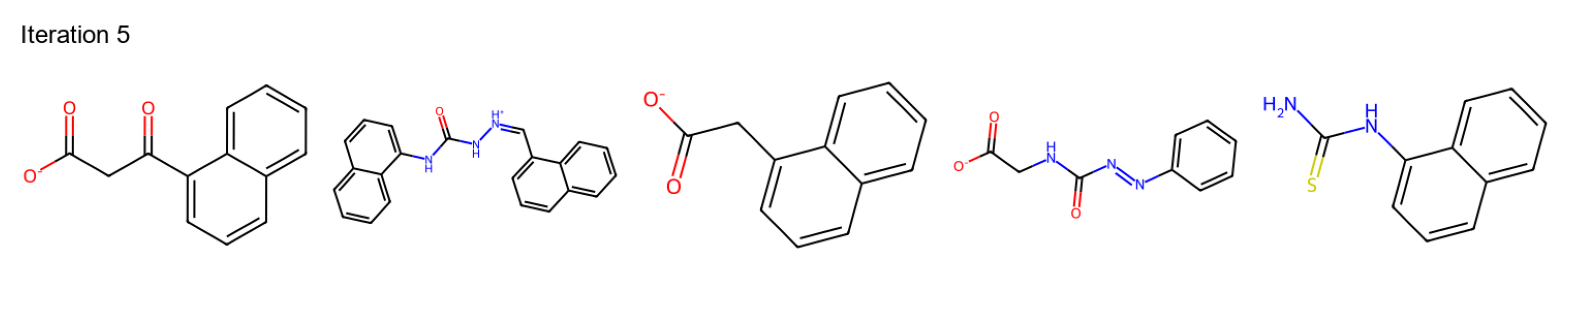

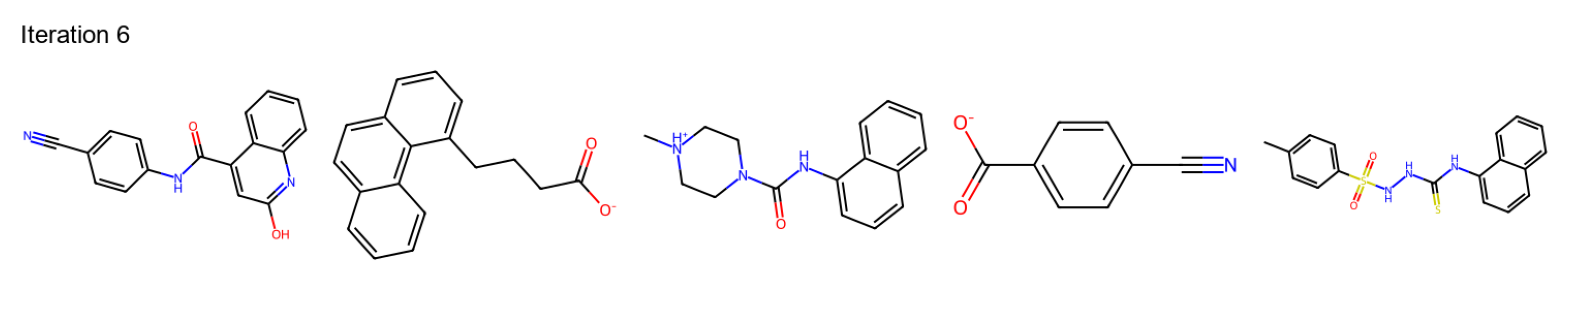

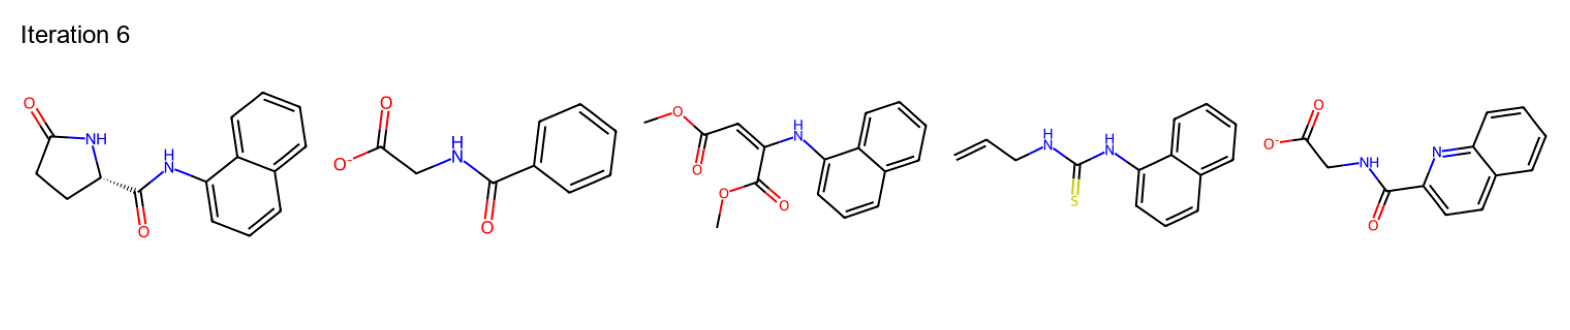

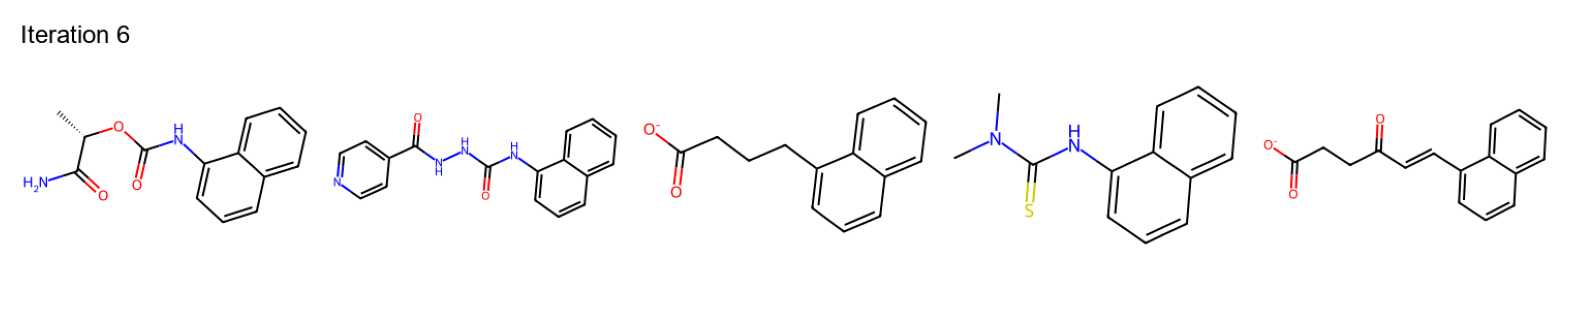

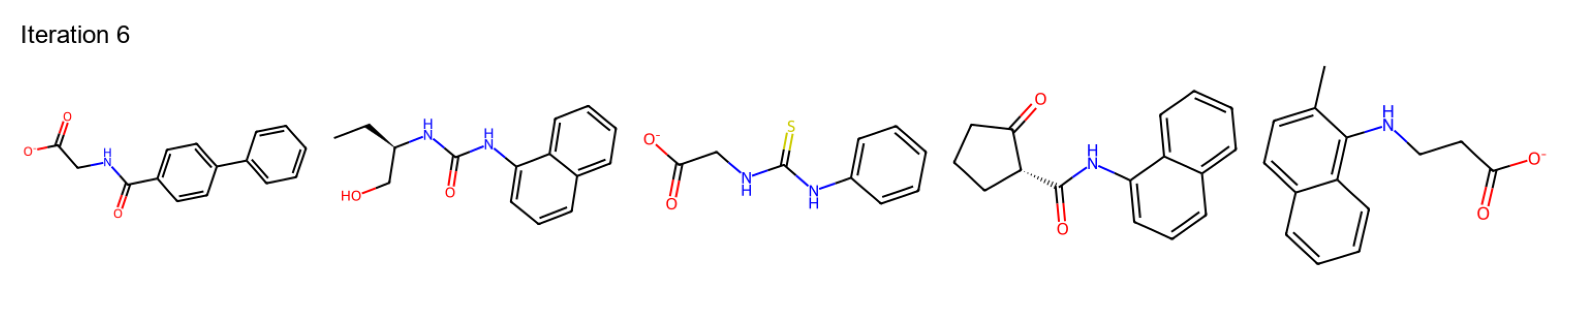

In [33]:
from rdkit import Chem
from rdkit.Chem import Draw
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

mols_list = []
for mols in mols_per_iteration:
    molecules = [Chem.MolFromSmiles(smiles) for smiles in mols]
    mols_list.append(molecules)

def draw_iterations(iterations):
    images = []
    for i, mols in enumerate(iterations):
        for start in range(0, len(mols), 5):
            # Increase subImgSize for higher resolution
            img = Draw.MolsToImage(mols[start:start+5], molsPerRow=5, subImgSize=(300, 300)) 
            draw = ImageDraw.Draw(img)
            
            # Use a font
            try:
                font = ImageFont.truetype("arial.ttf", 24)
            except IOError:
                font = ImageFont.load_default()
            
            # Add iteration label
            draw.text((10, 10), f"Iteration {i+1}", fill="black", font=font)
            
            images.append(img)
    
    return images

images = draw_iterations(mols_list)

# Display the images
for img in images:
    plt.figure(figsize=(20, 20))
    plt.imshow(img)
    plt.axis('off')
    plt.show()